# Chapter 1: Explroatory Data Analysis


In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Elements of Structured Data**

*   Numeric

    * Continuous: e.g wind speed or time duraton
    * Discrete: e.g occurence of an event

*   Categorical

  * Binary data
  * Ordinal data : Data is order (e.g 1,2,3,4,5)

## **Rectangular Data**
a 2D matrix with rows indicating records(cases) and columns indicating features(variables).\
**Column** is feature, known as attribute, input, predictor, variable. \
**Outcome** is known as dependent variable, response, target, output \
**Row** is known as record, known as case, example, instance, observation, pattern, sample \


## **Nonrectangular Data Structures**


*   time series data
*   spatial data structures (mapping and location)
*   Graph (netowrk) data structures



## **Estimates of Location**

In [2]:
df=pd.read_csv("./data/state.csv")
df.shape

(50, 4)

In [3]:
df.head(1)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL


##### **Mean:** sum of all values divided by number of values

In [4]:
print("Mean of Population: ", df.Population.mean())

Mean of Population:  6162876.3


##### **Trimmed mean**:  trimmed mean removes a proportion of the largest and smallest observations and then takes the average of the numbers that remain in the dataset.This helps to eliminate influence of extreme values.

In [5]:
print("Trimmed mean of population: ", stats.trim_mean(df.Population, 0.1))

Trimmed mean of population:  4783697.125


##### **weighted mean** : multiply each data value by a weight and divide the sum by sum of weight. \




**Weighted Mean Formula** = (w₁x₁ + w₂x₂ + ... + wₙxₙ) / (w₁ + w₂ + ... + wₙ) \
Motivation:


*   Some values are more variable than others => give lower weight. e.g: when we take average of multiple sensors, we downweight the less accurate sensors
*   data does not equaly represent different group. For example, give heigher weight to groups that are underrepresented

To calculate weighted mean in python, we use Numpy

In [6]:
print("Weighted mean of murder rate: ", np.average(df['Murder.Rate'], weights=df['Population']))

Weighted mean of murder rate:  4.445833981123393


##### **Median** : middle number on sorted list of data \


In [7]:
print("Median of Population: ", df.Population.median())
print("Median of Murder Rate: ", df['Murder.Rate'].median())
print("Weighted Median of Murder Rate: ", df['Murder.Rate'].median())

Median of Population:  4436369.5
Median of Murder Rate:  4.0
Weighted Median of Murder Rate:  4.0


##### **Weighted Median**: a value that sum of weights is equal for lower and upper halves of the sorted list.

In [8]:
# use Population as weight
df_sorted=df.sort_values('Murder.Rate')
pop_cumsum = df.Population.cumsum()
pop_cut_off = df.Population.sum()/2.

df_sorted[df_sorted.Population.cumsum() >= pop_cut_off].iloc[0,2]

np.float64(4.4)

The basic metric for localization is the average, but this can be sensitive to outliers. \
Other metrics (median, trimmed mean) are more robust. \
Robust means not sensitive to outliers \
Outliers is extreme cases, value that is distant from other values in a dataset

## **Estimates of Variability**

##### **Deviation**: Difference between the observed values ​​and the location estimate. \
**mean absolute deviation** \
** Variance**:  Sum of squares of deviations from the mean, divided by n-1 \
**Standard Deviation** : squared root of variance

Note: why use n-1 for degrees of freedome: n-1 and n is not much different since n is large enough, you want to make estimates of a population based on a sample. By divide by n-1, standard deviation becomes unbiased estimate.

Standard deviation, variance is not robust to outliers. \
**Median absolute deviation (MAD)** is robust to outliers

In [9]:
print("Standard deviation of poppulation: ", df.Population.std())

Standard deviation of poppulation:  6848235.347401142


In [10]:
print("MAD of population: ", stats.median_abs_deviation(df.Population))

MAD of population:  2596702.0


##### **Percentile / Quantil**: Value such P percent of values ​​assume this value or less, and (100-P) percent assume this value or more.\
**Interquatile range (IQR)**: Difference between the 75 percentile and the 25 percentile.

In [11]:
q1=df.Population.quantile(0.25)
q3=df.Population.quantile(0.75)
iqr=q3-q1
print("interquatile range: ", iqr)

interquatile range:  4847308.0


## **Exploring Data Distribution**

##### **Boxplots** in 5%, 25%, 50%, 75%, 95%

In [12]:
q_5 = df['Murder.Rate'].quantile(0.05).round(2)
q_25 = df['Murder.Rate'].quantile(0.25).round(2)
q_50 = df['Murder.Rate'].quantile(0.50).round(2)
q_75 = df['Murder.Rate'].quantile(0.75).round(2)
q_95 = df['Murder.Rate'].quantile(0.95).round(2)
print(f'5% {q_5} - 25% {q_25} - 50% {q_50} - 75% {q_75} - 95% {q_95}')

5% 1.6 - 25% 2.42 - 50% 4.0 - 75% 5.55 - 95% 6.51


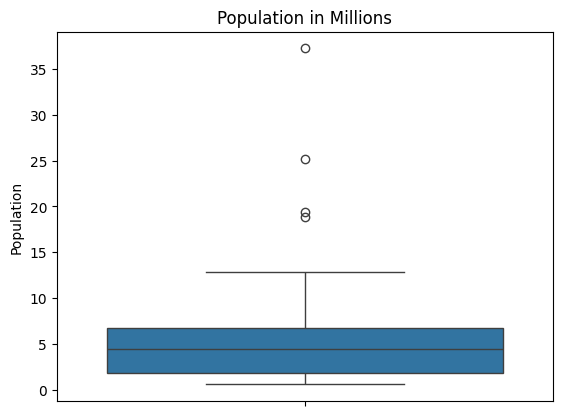

In [13]:
# plt.boxplot(df['Murder.Rate']) # can create basic boxplots.
sns.boxplot(df.Population/1000000)
plt.title('Population in Millions')
plt.show()


##### **Frequency Table AND histogram**

*Skewness*: whether data is skwed to larger or smaller values  \
*kurtosis*: propensity of the data to have extreme values

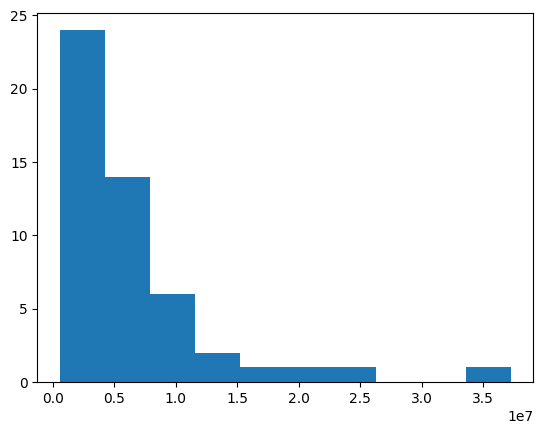

In [15]:
counts, bins, _ = plt.hist(df.Population)
plt.title("")
plt.show()


##### **Density plot** : distribution of data as continuous line

<Axes: ylabel='Density'>

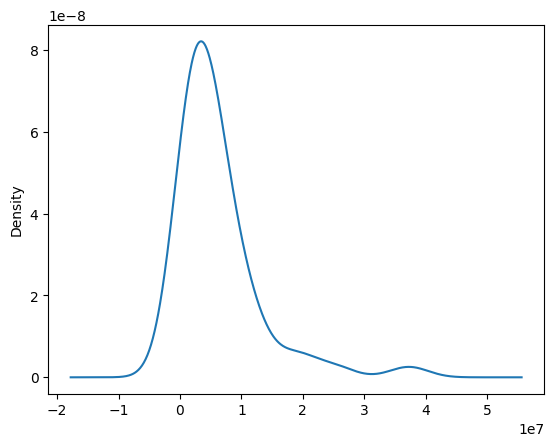

In [16]:
df.Population.plot.density()

<Axes: xlabel='Murder.Rate', ylabel='Count'>

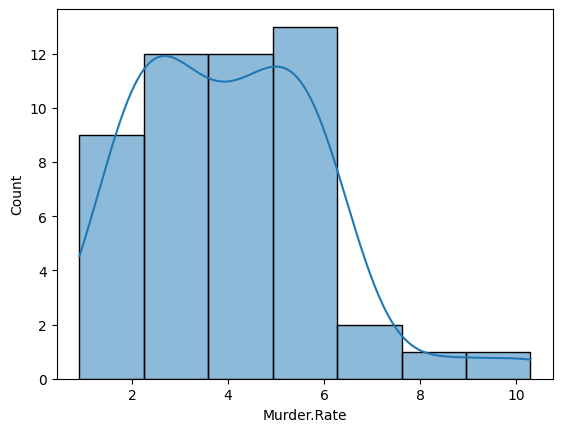

In [17]:
 sns.histplot(df['Murder.Rate'], kde=True)

##### **mode**: value appears most often in the data \
**Expected value**:   a weighted average that takes into account the probability of occurrence of a category.

## Correlation

##### **Correlation coefficient** (Pearson's correlation coefficient): Metric that measures the level at which numerical variables are associated with each other (ranges from -1 to +1). Other Pearson, we have *Spearman's rho* or *Kendall's tau*. These coefficients based on rank of the data, so they are robust to outliers \
Coefficients value range from [-1, 1]
**Correlation matrix**: Table in which variables are shown in both rows and columns, and cell values ​​are the correlation between variables. \
**Scatter diagram**: Graph in which the x axis is the value of one variable and the y axis is the value of another. Each point on the graph is a record. Standard way of viewing the relationship between two variables.

In [19]:
sp500_px=pd.read_csv("./data/sp500_data.csv.gz")
sp500_px.index=pd.to_datetime(sp500_px.iloc[:,0])
sp500_px.drop(sp500_px.columns[0], axis=1, inplace=True)

sp500_sym = pd.read_csv('./data/sp500_sectors.csv')


In [20]:
sp500_px.head(1)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1993-01-29,0.0,0.060124,-0.0221,0.0,0.0,0.018897,0.007368,0.092165,0.25914,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.0,0.015564,1.75,0.125,0.0


In [21]:
sp500_sym[sp500_sym.sector=='etf'].head(1)


,sector,sector_label,sub_sector,symbol
315,etf,EFTs,industrials,XLI


In [22]:
etfs = sp500_px.loc[sp500_px.index>"2012-07-01", sp500_sym.loc[sp500_sym.sector=='etf', 'symbol']]
etfs.shape

(754, 17)

In [23]:
etfs.head(1)

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
Unnamed: 0,,,,,,,,,,,,,,,,,
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.4,0.0,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668


<Axes: >

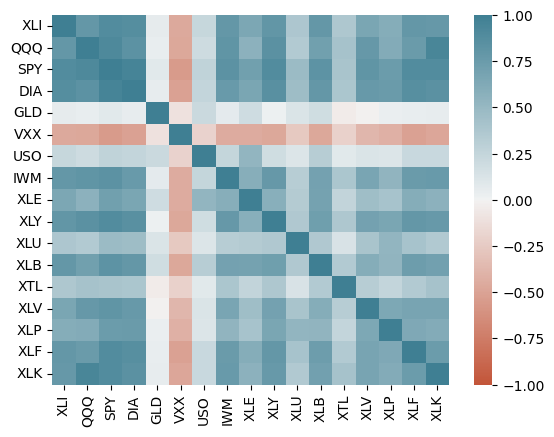

In [24]:
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,cmap=sns.diverging_palette(20, 220, as_cmap=True))

In [25]:
etfs.corr().style.background_gradient(cmap='coolwarm')

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.000000,0.785865,0.888865,0.869680,0.056554,-0.468196,0.236881,0.782380,0.650054,0.798080,0.380809,0.784144,0.374000,0.663022,0.600424,0.787340,0.777773
QQQ,0.785865,1.000000,0.908995,0.834440,0.043553,-0.470555,0.199492,0.810158,0.560044,0.839701,0.346667,0.713463,0.421790,0.775392,0.614806,0.752771,0.945126
SPY,0.888865,0.908995,1.000000,0.953726,0.078722,-0.547074,0.272069,0.833937,0.713300,0.887028,0.481928,0.826053,0.406181,0.811269,0.744466,0.883616,0.886588
DIA,0.869680,0.834440,0.953726,1.000000,0.051523,-0.511327,0.256793,0.758012,0.658311,0.847043,0.463364,0.787415,0.383928,0.771044,0.753725,0.860556,0.842757
GLD,0.056554,0.043553,0.078722,0.051523,1.000000,-0.107488,0.216563,0.070110,0.188625,0.017467,0.121611,0.184366,-0.042233,-0.010200,0.033047,0.043039,0.053022
VXX,-0.468196,-0.470555,-0.547074,-0.511327,-0.107488,1.000000,-0.195397,-0.448942,-0.448474,-0.474756,-0.260395,-0.470890,-0.205661,-0.380925,-0.416913,-0.514365,-0.477258
USO,0.236881,0.199492,0.272069,0.256793,0.216563,-0.195397,1.000000,0.249799,0.525943,0.183275,0.113182,0.324166,0.078796,0.119500,0.116857,0.221760,0.225962
IWM,0.782380,0.810158,0.833937,0.758012,0.070110,-0.448942,0.249799,1.000000,0.586991,0.779750,0.325003,0.701533,0.387274,0.664288,0.537065,0.756282,0.760438
XLE,0.650054,0.560044,0.713300,0.658311,0.188625,-0.448474,0.525943,0.586991,1.000000,0.578956,0.337942,0.689778,0.260463,0.454457,0.413486,0.599129,0.559324
XLY,0.798080,0.839701,0.887028,0.847043,0.017467,-0.474756,0.183275,0.779750,0.578956,1.000000,0.366827,0.721232,0.370299,0.702860,0.663055,0.782053,0.772189


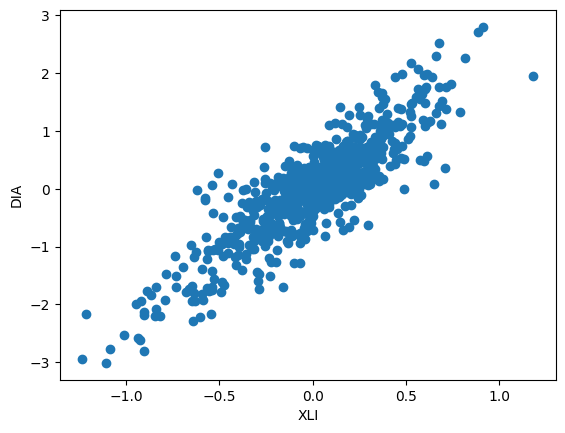

In [26]:
# positively correlated
plt.xlabel('XLI')
plt.ylabel('DIA')
plt.scatter(etfs['XLI'], etfs['DIA'])
plt.show()

## **Exploring Two or More Variables**

In [27]:
kc_tax = pd.read_csv("./data/kc_tax.csv.gz")
# remove outliers: very expensive and small or large residneces
kc_tax = kc_tax[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500)]
kc_tax.shape

(432693, 3)

In [ ]:
kc_tax.head()

##### **Hexagonal Binning**: Useful for examining the relationship of two numeric variables without being overwhelmed by large amounts of data.

Group records into hexagonal bins and plot hexagon with color indicating the number of record in that bin

**Contour Plots**: Used to visualize the density of two numeric variables like a topographical map.

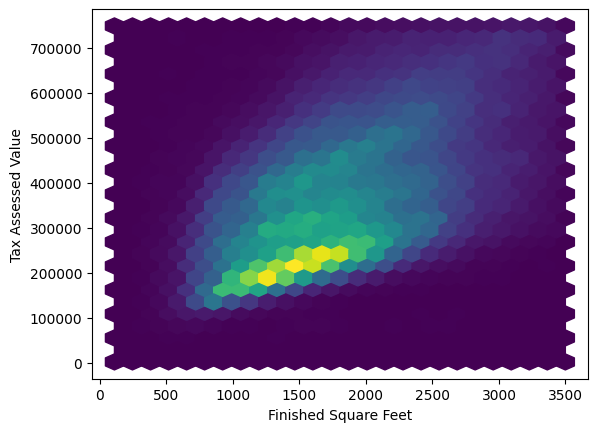

In [28]:
    plt.hexbin(kc_tax.SqFtTotLiving, kc_tax.TaxAssessedValue,  gridsize=25)

    plt.xlabel('Finished Square Feet')
    plt.ylabel('Tax Assessed Value')
    # plt.title('Hexbin Plot')
    plt.show()


##### When there is more than two variables, use **conditioning**.

In [29]:
kc_tax_zip1 = kc_tax[kc_tax.ZipCode == 98188]
kc_tax_zip2 = kc_tax[kc_tax.ZipCode == 98105]
kc_tax_zip3 = kc_tax[kc_tax.ZipCode == 98108]
kc_tax_zip4 = kc_tax[kc_tax.ZipCode == 98126]

Text(0.5, 0, 'zipcode = 98126')

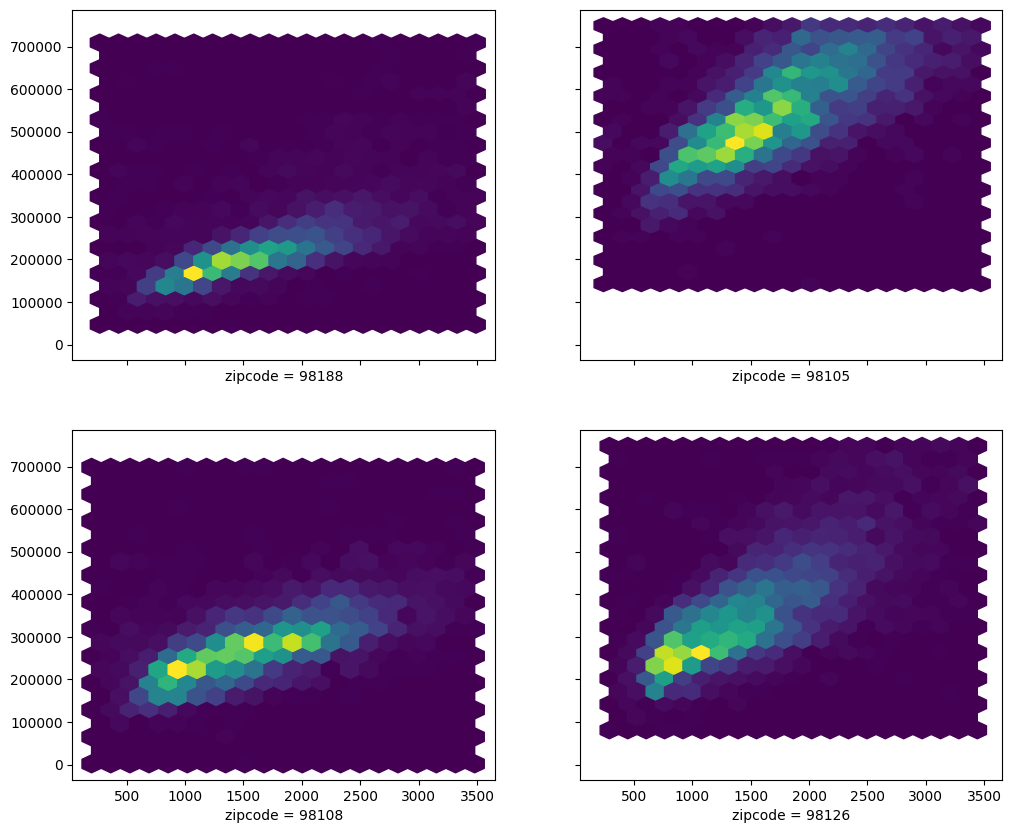

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 10))
ax1.hexbin(kc_tax_zip1.SqFtTotLiving, kc_tax_zip1.TaxAssessedValue, gridsize=20)
ax1.set_xlabel('zipcode = 98188')

ax2.hexbin(kc_tax_zip2.SqFtTotLiving, kc_tax_zip2.TaxAssessedValue, gridsize=20)
ax2.set_xlabel('zipcode = 98105')

ax3.hexbin(kc_tax_zip3.SqFtTotLiving, kc_tax_zip3.TaxAssessedValue, gridsize=20)
ax3.set_xlabel('zipcode = 98108')

ax4.hexbin(kc_tax_zip4.SqFtTotLiving, kc_tax_zip4.TaxAssessedValue, gridsize=20)
ax4.set_xlabel('zipcode = 98126')

##### **Contingency Table for Two categorical variables**: Summarize the counts between two categorical variables.

In [31]:
lc_loans = pd.read_csv('./data/lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [32]:
pd.crosstab(lc_loans.grade, lc_loans.status)

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,1562,50051,20408,469
B,5302,93852,31160,2056
C,6023,88928,23147,2777
D,5007,53281,13681,2308
E,2842,24639,5949,1374
F,1526,8444,2328,606
G,409,1990,643,199


##### **Boxplots for categorical and numerical data**

Violin plot shows concentration in the distribution

In [33]:
airline_stats= pd.read_csv('./data/airline_stats.csv')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


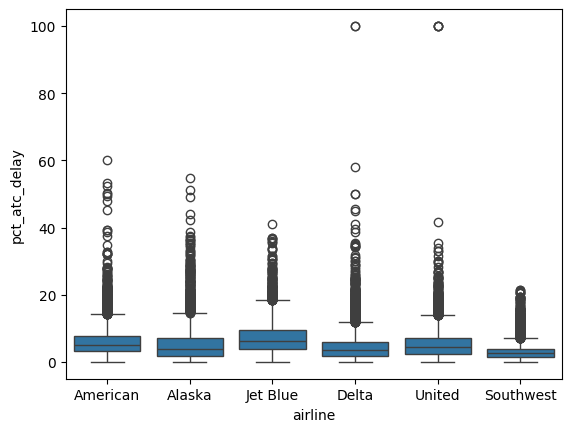

In [34]:
sns.boxplot(x=airline_stats.airline, y=airline_stats.pct_atc_delay)
plt.show()

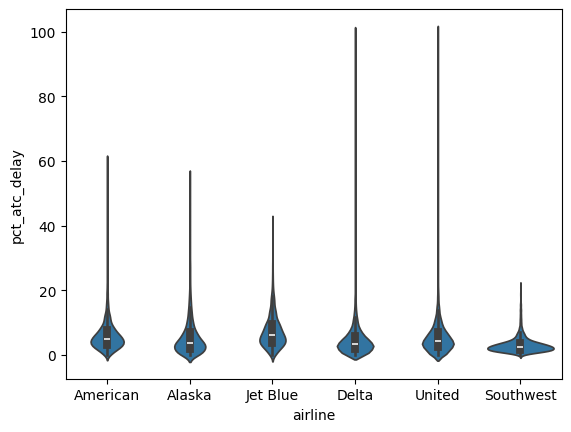

In [35]:

sns.violinplot(x=airline_stats.airline, y=airline_stats.pct_atc_delay)
plt.show()